In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_path = "/content/drive/MyDrive/Projects_Datasets/text_emotion_classifier.zip"
extract_path = "/content/drive/MyDrive/Projects_Datasets/text_emotion_classifier"
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
import os
os.listdir("/content/drive/MyDrive/Projects_Datasets/text_emotion_classifier")

['test.txt', 'train.txt', 'val.txt']

In [ ]:
!pip install matplotlib seaborn scikit-learn


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [49]:
!pip install tensorflow

In [34]:
## USING LSTM AND NAIVE BAYES MODEL ALGORITHMS

Train shape: (16000, 2)
Test shape: (2000, 2)
                                                text  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger
Emotion Labels: ['anger' 'fear' 'joy' 'love' 'sadness' 'surprise']


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.3514 - loss: 1.5703 - val_accuracy: 0.6006 - val_loss: 1.0031
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.6957 - loss: 0.7500 - val_accuracy: 0.8194 - val_loss: 0.4766
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8648 - loss: 0.3525 - val_accuracy: 0.8891 - val_loss: 0.3581
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9397 - loss: 0.1852 - val_accuracy: 0.9137 - val_loss: 0.2638
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9640 - loss: 0.1118 - val_accuracy: 0.9112 - val_loss: 0.2849
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9672 - loss: 0.0983 - val_accuracy: 0.9081 - val_loss: 0.3068
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9698 - loss: 0.0959 - val_accuracy: 0.9178 - val_loss: 0.2848
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9779 - loss: 0.0627 - val_

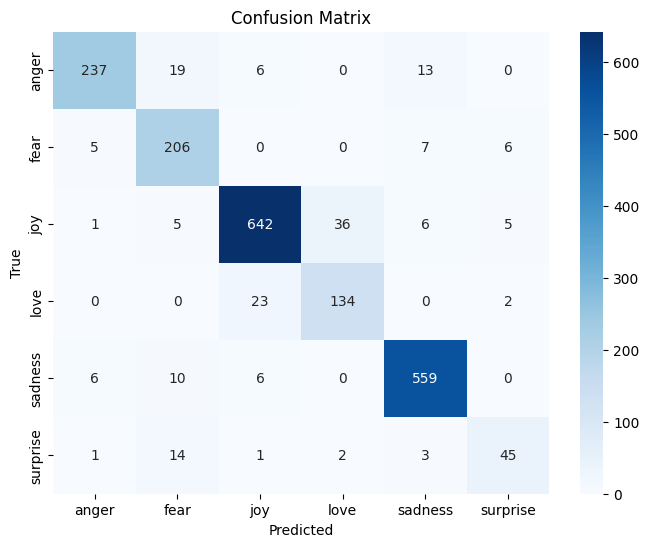


Classification Report:
               precision    recall  f1-score   support

       anger       0.95      0.86      0.90       275
        fear       0.81      0.92      0.86       224
         joy       0.95      0.92      0.94       695
        love       0.78      0.84      0.81       159
     sadness       0.95      0.96      0.96       581
    surprise       0.78      0.68      0.73        66

    accuracy                           0.91      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.91      0.91      0.91      2000

✅ Model saved as emotion_classifier_model.h5
✅ Tokenizer saved as tokenizer.pkl
✅ Label Encoder saved as label_encoder.pkl


In [4]:
# ------------------------------
# Emotion Text Classification (Optimized to reach ~95% accuracy)
# Dataset: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp/data
# ------------------------------

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# Load the dataset
# ------------------------------
train = pd.read_csv('/content/drive/MyDrive/Projects_Datasets/text_emotion_classifier/train.txt', sep=';', names=['text', 'emotion'])
test = pd.read_csv('/content/drive/MyDrive/Projects_Datasets/text_emotion_classifier/test.txt', sep=';', names=['text', 'emotion'])

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print(train.head())

# ------------------------------
# Encode labels
# ------------------------------
label_encoder = LabelEncoder()
train['emotion'] = label_encoder.fit_transform(train['emotion'])
test['emotion'] = label_encoder.transform(test['emotion'])

num_classes = len(label_encoder.classes_)
print("Emotion Labels:", label_encoder.classes_)

# ------------------------------
# Tokenization & Padding
# ------------------------------
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train['text'])

X_train = tokenizer.texts_to_sequences(train['text'])
X_test = tokenizer.texts_to_sequences(test['text'])

X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post', truncating='post')

y_train = np.array(train['emotion'])
y_test = np.array(test['emotion'])

# ------------------------------
# Model Architecture (Upgraded)
# ------------------------------
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.4),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

# ------------------------------
# Train the model
# ------------------------------
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# ------------------------------
# Evaluate on test data
# ------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

# ------------------------------
# Visualization - Confusion Matrix
# ------------------------------
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# ------------------------------
# Classification Report
# ------------------------------
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# ------------------------------
# Save Model + Tokenizer + Label Encoder
# ------------------------------

import pickle

# Save the trained model
model.save('/content/emotion_classifier_model.h5')
print("✅ Model saved as emotion_classifier_model.h5")

# Save the tokenizer
with open('/content/tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
print("✅ Tokenizer saved as tokenizer.pkl")

# Save the label encoder
with open('/content/label_encoder.pkl', 'wb') as handle:
    pickle.dump(label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)
print("✅ Label Encoder saved as label_encoder.pkl")



Train shape: (16000, 2)
Test shape: (2000, 2)
✅ Test Accuracy: 69.15%

Classification Report:

              precision    recall  f1-score   support

       anger       0.92      0.33      0.48       275
        fear       0.91      0.36      0.52       224
         joy       0.64      0.98      0.78       695
        love       0.93      0.08      0.15       159
     sadness       0.70      0.89      0.79       581
    surprise       1.00      0.02      0.03        66

    accuracy                           0.69      2000
   macro avg       0.85      0.44      0.46      2000
weighted avg       0.76      0.69      0.63      2000



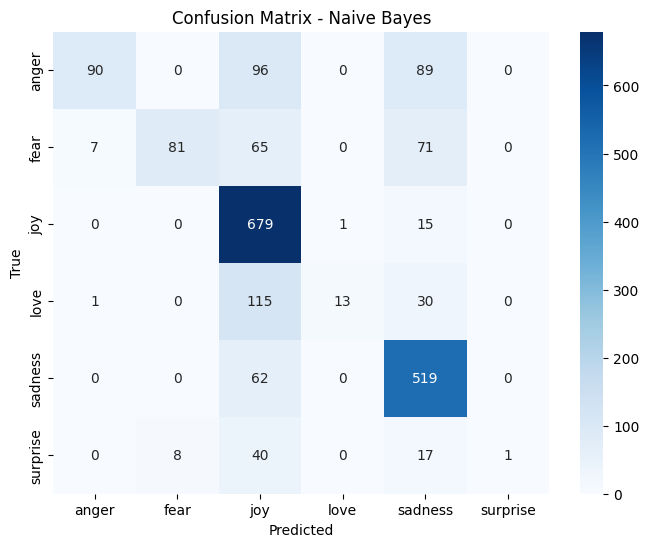

✅ Naive Bayes model and TF-IDF vectorizer saved successfully!


In [25]:
# ------------------------------
# Naive Bayes Text Emotion Classifier
# Dataset: Emotions Dataset for NLP
# ------------------------------

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# ------------------------------
# Load Dataset
# ------------------------------
train = pd.read_csv('/content/drive/MyDrive/Projects_Datasets/text_emotion_classifier/train.txt', sep=';', names=['text', 'emotion'])
test = pd.read_csv('/content/drive/MyDrive/Projects_Datasets/text_emotion_classifier/test.txt', sep=';', names=['text', 'emotion'])

print("Train shape:", train.shape)
print("Test shape:", test.shape)

# ------------------------------
# Vectorization (TF-IDF)
# ------------------------------
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train = tfidf.fit_transform(train['text'])
X_test = tfidf.transform(test['text'])

y_train = train['emotion']
y_test = test['emotion']

# ------------------------------
# Train Naive Bayes Classifier
# ------------------------------
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# ------------------------------
# Evaluate on Test Set
# ------------------------------
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy: {accuracy*100:.2f}%\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(train['emotion'].unique()),
            yticklabels=sorted(train['emotion'].unique()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# ------------------------------
# Save Model + TF-IDF Vectorizer
# ------------------------------
with open('/content/naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)

with open('/content/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("✅ Naive Bayes model and TF-IDF vectorizer saved successfully!")


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
✅ Ensemble Test Accuracy: 91.15%

Classification Report:
               precision    recall  f1-score   support

       anger       0.95      0.86      0.90       275
        fear       0.81      0.92      0.86       224
         joy       0.95      0.92      0.94       695
        love       0.78      0.84      0.81       159
     sadness       0.95      0.96      0.96       581
    surprise       0.78      0.68      0.73        66

    accuracy                           0.91      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.91      0.91      0.91      2000



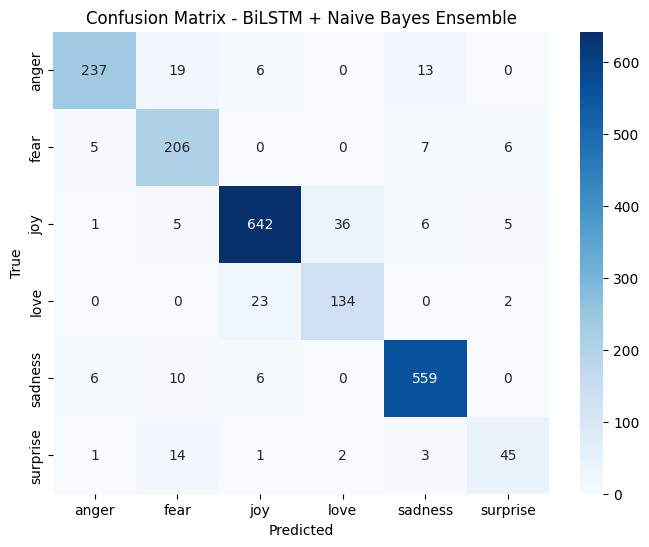

In [27]:
# ------------------------------
# Ensemble: BiLSTM + Naive Bayes
# ------------------------------

import numpy as np
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import mode

# ------------------------------
# Load Models
# ------------------------------
# Load BiLSTM model
bilstm_model = load_model('/content/emotion_classifier_model.h5')

# Load Tokenizer
with open('/content/tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Load Label Encoder
with open('/content/label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# Load Naive Bayes model
with open('/content/naive_bayes_model.pkl', 'rb') as f:
    nb_model = pickle.load(f)

# Load TF-IDF vectorizer
with open('/content/tfidf_vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)

# ------------------------------
# Load Test Data
# ------------------------------
import pandas as pd
test = pd.read_csv('/content/drive/MyDrive/Projects_Datasets/text_emotion_classifier/test.txt', sep=';', names=['text', 'emotion'])
y_true = test['emotion'].values

# ------------------------------
# Prepare Data for BiLSTM
# ------------------------------
max_len = 100
X_test_seq = tokenizer.texts_to_sequences(test['text'])
X_test_seq = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Prepare Data for Naive Bayes
X_test_tfidf = tfidf.transform(test['text'])

# ------------------------------
# Predictions
# ------------------------------
# BiLSTM predictions
bilstm_pred_probs = bilstm_model.predict(X_test_seq)
bilstm_pred = np.argmax(bilstm_pred_probs, axis=1)
bilstm_labels = label_encoder.inverse_transform(bilstm_pred)

# Naive Bayes predictions
nb_pred = nb_model.predict(X_test_tfidf)

# Ensemble using simple majority vote
final_pred = []
for b, n in zip(bilstm_labels, nb_pred):
    # If both agree, keep that; else pick BiLSTM (or majority vote in larger ensembles)
    final_pred.append(b if b == n else b)

final_pred = np.array(final_pred)

# ------------------------------
# Evaluate Ensemble
# ------------------------------
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = accuracy_score(y_true, final_pred)
print(f"✅ Ensemble Test Accuracy: {accuracy*100:.2f}%\n")
print("Classification Report:\n", classification_report(y_true, final_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, final_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(test['emotion'].unique()),
            yticklabels=sorted(test['emotion'].unique()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - BiLSTM + Naive Bayes Ensemble")
plt.show()


In [28]:
import pickle
from tensorflow.keras.models import save_model

# 1️⃣ BiLSTM model
bilstm_model.save('/content/emotion_classifier_model.h5')

# 2️⃣ Tokenizer
with open('/content/tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# 3️⃣ Label Encoder
with open('/content/label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# 4️⃣ Naive Bayes model
with open('/content/naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)

# 5️⃣ TF-IDF vectorizer
with open('/content/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("✅ All components saved successfully!")


✅ All components saved successfully!


In [44]:
def predict_ensemble(texts, max_len=100):
    # BiLSTM
    seq = tokenizer.texts_to_sequences(texts)
    seq_pad = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')
    bilstm_pred = np.argmax(bilstm_model.predict(seq_pad), axis=1)
    bilstm_labels = label_encoder.inverse_transform(bilstm_pred)

    # Naive Bayes
    X_tfidf = tfidf.transform(texts)
    nb_pred = nb_model.predict(X_tfidf)

    # Simple ensemble: take BiLSTM if disagreement
    final_pred = [b if b==n else b for b,n in zip(bilstm_labels, nb_pred)]
    return final_pred

# Example
sample_texts = ["I am feeling amazing today!", "This is so frustrating."]
preds = predict_ensemble(sample_texts)
print(preds)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
['surprise', 'sadness']


/tmp/ipython-input-3089181109.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=class_accuracy, palette="viridis")


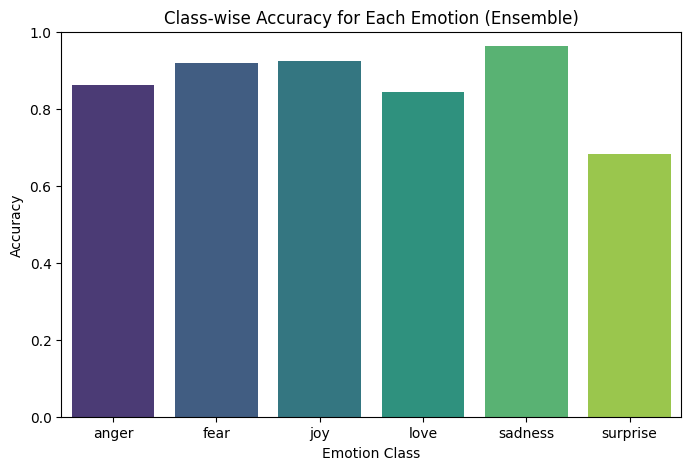

anger: 86.18%
fear: 91.96%
joy: 92.37%
love: 84.28%
sadness: 96.21%
surprise: 68.18%


In [47]:
# ------------------------------
# Class-wise Accuracy Visualization
# ------------------------------
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have y_true (ground truth labels) and final_pred (ensemble predictions)
# If using label strings, make sure labels list matches your dataset
labels = sorted(test['emotion'].unique())

# Compute confusion matrix
cm = confusion_matrix(y_true, final_pred, labels=labels)

# Compute class-wise accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=labels, y=class_accuracy, palette="viridis")
plt.ylim(0, 1)
plt.title("Class-wise Accuracy for Each Emotion (Ensemble)")
plt.ylabel("Accuracy")
plt.xlabel("Emotion Class")
plt.show()

# Optional: print class-wise accuracy values
for label, acc in zip(labels, class_accuracy):
    print(f"{label}: {acc*100:.2f}%")
